# Analisis de datos del Titanic

## 1. Importando librerias necesarias para el analisis
---

In [41]:
import pandas as pd # Libreria para leer y manejar datos de tablas desde los archivos archivos .csv
import numpy as np # libreria para facilitar la realizacion operaciones matematicas avanzadas
import matplotlib.pyplot as plt # libreria para realizar graficos
from sklearn.linear_model import LogisticRegression #libreria para entrenar modelos usando regresion logistica 
from sklearn.tree import DecisionTreeClassifier #libreria para entrenar modelos usando Arboles de decision 
from sklearn.metrics import plot_confusion_matrix # libreria para generar los graficos de los modelos

---
## 2. Cargando los datasets
---

In [2]:
train = pd.read_csv('./../data/train.csv') # cargamos la informacion de los trenes desde la carpeta "data" ubicada un directorio atras
test = pd.read_csv('./../data/test.csv') # cargamos la informacion de los test realizados por kaggle desde la carpeta "data" ubicada un directorio atras

In [3]:
train.head() # Cargamos un encabezado de la data de train para ver si los datos se cargaron correctamente

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---
## 3. Revisamos que y exploramos los datos que hemos cargado
---

In [4]:
train.columns # Obtenemos todas las columnas disponibles en la tabla y sus nombres

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.shape #  Obtenemos las dimenciones de la tabla, (filas y columnas)

(891, 12)

In [6]:
table_info = train.info() # Vemos la informacion de la tabla (Tipo de dato, Si posee campos que admitan valores nulos y la cantidad de datos de cada columna)
                          # Esto nos sirve para determinar que tipo de campos son cada columna, y para ver los datos que faltan en la tabla por cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [7]:
train.describe() # Obtenemos informacion sobre como se distribuyen las variables numericas a lo largo de la tabla(Conteo, promedio, minimos, maximos, mediana)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.describe(include=['O']) # Obtenemos informacion sobre las variables categoricas de la tabla

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


---
## 4. EDA - Estudio de las variable objetivo:
#### Marco teorico
- Problematica / Pregunta de investigacion: Existio alguna relacion entre los sobrevivientes del titanic y sus caracteristicas al abordar el mismo?.
- Solucion: Analizar estadisticamente las variables que que se vieron involucradas.
- Planteamiento: Analizar como se comportaron los sobrevivientes del titanic con respecto a otras variables.
- Objetivo: Encontrar un patron logico que correlacione la la supervivencia con respecto a otros atributos/variables asociados a los supervivientes.
- Prueba: Generar predicciones con los datos obtenidos.
---

In [9]:
train.groupby(['Survived']).count()['PassengerId'] # Primero obtenemos la cantidad de pasajeros que sobrevivieron (1), y que no sobrevivieron (0) de la data.

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [10]:
grouped_sex = train.groupby(['Survived','Sex']).count()['PassengerId'] # Luego observamos que como se distribuye el sexo entre los sobrevivientes
grouped_sex.unstack(level=0)                                           # Cuanto de los sobrebiventes eran hombres y cuantos mujeres y lo asignamos a una variable

Survived,0,1
Sex,,
female,81,233
male,468,109


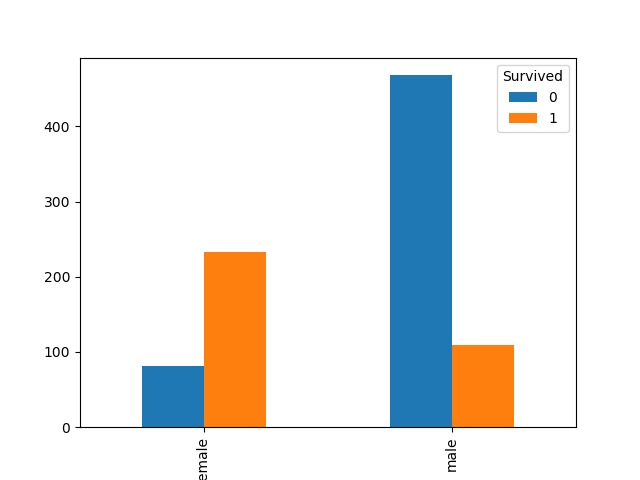

In [11]:
(grouped_sex.unstack(level=0).plot.bar()) # Generamos un grafico para analizar el comportamiento de esta tabla y lo mostramos por pantalla
plt.show()

> ### *Aqui podemos notar que la mayoria de los pasajeros que lograron sobrevivir eran mujeres, mientras que de los que no sobrevivieron, la mayoria eran hombres*

---
## 5.Procesamiento de datos
#### Seleccionamos las variables que queremos trabajar
- Survived
- Sex
- Age
- Pclass
---

In [12]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3) #Generamos una tabla con los 3 primeros registros de las variables que hemos seleccionado

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3


In [13]:
train[['Survived', 'Sex', 'Age', 'Pclass']].info() # Comprobamos nuevamente la distribucion de los datos entre nuestras diferentes variables y si poseen valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 24.4+ KB


**Nota: Segun el output de el paso anterior notamos los siguentes puntos:**
- La variable Sex, es una variable de tipo objeto, esto puede generar problemas mas adelante con el procesamiento de los datos
- La columna Age, posee valores nulos(sin datos) por lo cual debemos de solucionar ese problemas antes de seguir con el procesameinto
**Puntos a mejorar de la tabla:**
> Convertir la variable Sex a un tipo de dato que sea Float, o Int

> Agregar los datos faltantes a la columna Age, o en su defecto eliminar las filas que no contengan datos

In [14]:
(train[train['Age'].isna()] 
      .groupby(['Sex', 'Pclass']) # Observamos los valores nulos en la variable edad, asi determinaremos como trataremos estos campos
      .count()['PassengerId']
      .unstack(level=0))

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


**Nota: Segun el output de el paso anterior notamos los siguentes puntos:**
- La mayoria de los campos que no tienen la edad registrada viajan en tercera clase.
- La mayoria de los que viajan en tercera clase que no registraron su edada son hombres.

> ***La mayoria de los pasajeros que no registraron su edad, fueron hombres que viajaron en tercera clase***

In [15]:
(train[train['Age'].isna()] 
      .groupby(['SibSp', 'Parch']) # Analizamos cuales son los parientes de las personas que no registraron su edad
      .count()['PassengerId']
      .unstack(level=0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


**Nota: Segun el output de el paso anterior notamos los siguentes puntos:**
- La gran mayoria son personas que viajaban totalmente solas.
- La gran mayoria de las personas que viajaban solas lo hacian en tercera clase.

> ***Podemos crear una variable que nos diga si la persona viajaba sola o acompanada***

In [37]:
train['Age'].median() #Vemos la media de la edad para rellenar los datos faltantes en nuestra nueva tabla

28.0

In [17]:
train['Age'] = train['Age'].fillna(28.0) # Llenamos los valores faltantes en la edad con el resultado de la media
train[['Survived', 'Sex', 'Age', 'Pclass']].info() # Mostramos nuevamente la distribucion de los datos en la tabla para asegurarnos que ya no existen valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 24.4+ KB


#### En este punto ya hemos solucionado el problema de la variable edad, ya no posee valores nulos

In [18]:
train['Sex'] = train['Sex'].map({'female': 1, 'male': 0}).astype(int) # Aqui lo que hacemos es decirle a la variable sexo que donde Female = 1 y Male = 0

#### Con esto ya solucionamos el problema de que el tipo de variable Sex no sea object, sino int

In [19]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3) # Mostramos nuevamente los 3 primeros valores de nuestra tabla para comprobar que todo se encuentra de manera correcta

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3


In [20]:
train['FlagSolo'] = np.where(
    (train['SibSp'] == 0) & (train['Parch'] == 0), 1, 0) # Creamos una variable que genere un campo que tendra 0 o 1 si esta persona viajaba acompanada  0 y si no 1

> En este punto ya hemos creado una variable en la tabla para saber si nuestro pasajero viajaba solo o no.

Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64


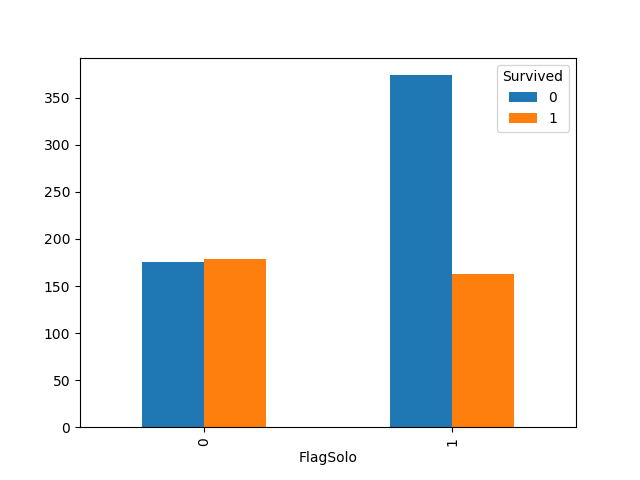

In [21]:
# Creamos una grafica para verificar la correlacion entre los sobrevivientes y si viajaban solos o no
grouped_flag = train.groupby(['Survived','FlagSolo']).count()['PassengerId']
print(grouped_flag)
(grouped_flag.unstack(level=0).plot.bar())
plt.show()

**Nota: Segun el output de el paso anterior notamos los siguentes puntos:**
- Las personas que no viajaban solos sobrevivieron mas que las que si
- La mayoria de los no viajaban solos sobrevivieron
- La mayoria de las personas que no sobrevivieron viajaban solos

> **Al parecer los que no viajaban solos tenian mas tendencia a sobrevivir que los que si**

In [22]:
train[['Survived', 'Sex', 'Age', 'Pclass', 'FlagSolo']].head(3) # Mostramos nuestra nueva tabla para comprobar que nuestra nueva variable se agrego correctamente

,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1


In [23]:
# variable dependiente - esta sera nuestra variable de entrenamiento
Y_train = train['Survived']

# preprocesamiento de variables independientes
features = ['Sex', 'Age', 'Pclass', 'FlagSolo']
X_train = train[features]

(891,) (891, 4)


---
## 6.Modelos de procesamiento
#### Seleccionamos nuestros modelos de prueba
- regresion logistica
- arboles de decision
---

In [24]:
# entrenando modelo regresión logistica
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [25]:
# entrenando modelo arboles de decisión
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

## 7. Evaluacion de los modelos

In [26]:
# Creamos una funcion para la evaluacion de que tan bien funciona nuestro modelo sobre los datos de entrenamiento usando una aproximacion del error
# Para esto crearemos un grafico de confucion que nos indique esta informacion
def conf_mat_acc(modelo):
  disp = plot_confusion_matrix(modelo, X_train, Y_train,
                        cmap=plt.cm.Blues, values_format="d")
  true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
  total_data = np.sum(disp.confusion_matrix)
  accuracy = true_pred/total_data
  print('accuracy: ', np.round(accuracy, 2))
  plt.show()

/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy:  0.79


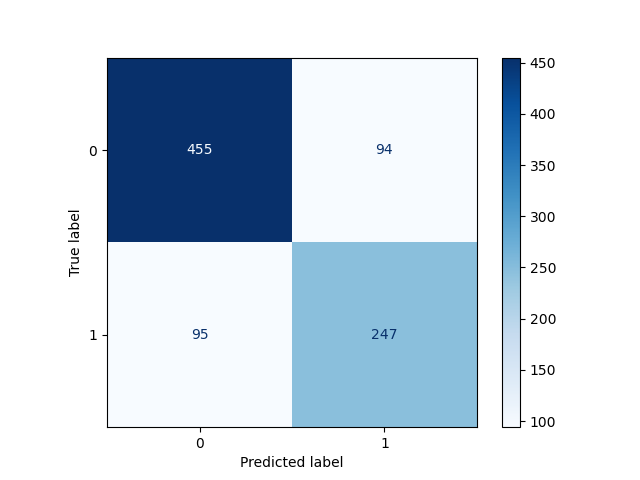

In [27]:
conf_mat_acc(logreg) # Generamos nuestro primer grafico de confucion para la regrecion logica

> #### ***Aqui podemos ver que nuestro modelo tiene una presicion del 0.79 o un 79%***

/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy:  0.89


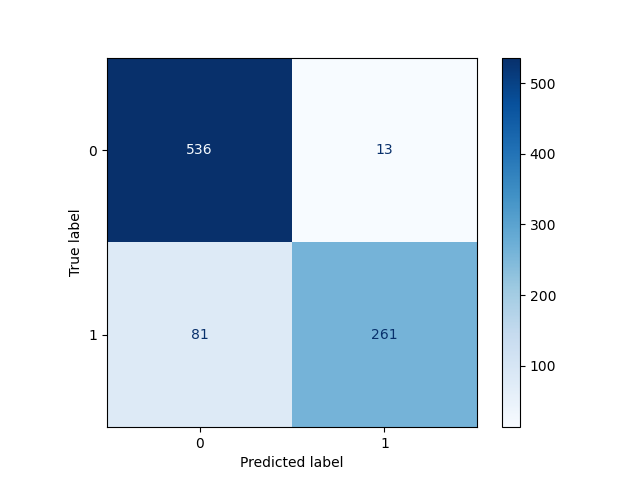

In [28]:
conf_mat_acc(decision_tree) # Generamos nuestro primer grafico de confucion para la Arbol de decisiones

> #### ***Aqui podemos ver que nuestro modelo tiene una presicion del 0.89 o un 89%***

## 8. Evaluación sobre el test set
Antes hicimos la matriz de confusión sobre el train set. Esto no es del todo correcto porque estamos utilizando como validación los datos que usamos de entrenamiento. Por lo tanto, la estimación del error sería sesgada y tendría poca capacidad de generalización a casos que no haya "visto" el modelo.

Por eso necesitamos utilizar el test set. Sin embargo.

In [29]:

# preprocesando test set

# hacer map a Sex
test['Sex'] = test['Sex'].map({'female': 1, 'male': 0}).astype(int)

# rellenar Age
test['Age'] = test['Age'].fillna(28.0)

# Crear FlagSolo
test['FlagSolo'] = np.where(
    (test['SibSp'] == 0) & (test['Parch'] == 0), 1, 0)

In [30]:
print(test.info())
test[features].head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FlagSolo     418 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(4)
memory usage: 29.5+ KB
None


,Sex,Age,Pclass,FlagSolo
0,0,34.5,3,1
1,1,47.0,3,0
2,0,62.0,2,1


In [31]:
# crear test set 
X_test = test[features]

print(X_test.shape)

(418, 4)


In [32]:
# prediccion de Survived en test set
Y_pred_log = logreg.predict(X_test)
Y_pred_tree = decision_tree.predict(X_test)
print(Y_pred_log[0:10]) # Imprimimos los 10 primeros registros 

[0 0 0 0 1 0 1 0 1 0]


>Nota: Estas predicciones deberían ser ahora comparadas con el valor real para obtener una mejor estimación del error de predicción sobre el test set y poder escoger un modelo.
Sin embargo, como es una competicion de Kaggle este valor solo lo conoce la plataforma.

- Vamos a exportar estos CSV y luego subirlos para ver cual tiene mejor rendimiento.

## 6. Predicción

In [33]:
# prediciendo sobre el test set
print(Y_pred_log[0:20]) #Imprimimos los 20 primeros registros de nuestras predicciones
print(Y_pred_tree[0:20])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
[0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0]


In [34]:
# Funcion para guardar los datos
def download_output(y_pred, name):
  output = pd.DataFrame({'PassengerId': test.PassengerId, 
                         'Survived': y_pred})
  output.to_csv(name, index=False)

In [35]:
download_output(Y_pred_log, 'pred_log.csv') # Guardamos los datos de nuestra prediccion en archivos .csv
download_output(Y_pred_tree, 'pred_tree.csv')